# Measurement based quantum computation
**Radoica Draškić & Joost Bus**

## Introduction
Measurement-based quantum computing (MBQC) is a clever approach towards quantum computing that makes use of entanglement as a resource for computation. This method, also referred to as one-way quantum computing, is very dissimilar from the gate-based model but is universal nonetheless. In a one-way quantum computer, we start out with an entangled state, a so-called cluster state, and apply particular single-qubit measurements that correspond to the desired quantum circuit. In MBQC, the measurements are the computation and the entanglement of the cluster state is used as a resource.

![one-way-quantum-computation-2001](mbqc_info_flow.PNG)

## Cluster states

### Theory
There is not one cluster state, but rather it’s a name for a class of highly entangled multi-qubit states. One example of a cluster state would be

$$|ψ⟩=\Pi_{(i,j)∈E(G)}CZ_{ij}|+⟩^{\otimes n},$$

where G is some graph and E(G) is the set of its edges.

**[image of a simple cluster state]**

![https://www.science.org/doi/10.1126/science.1142892](measure_entangle.jpeg)

### Example: how to construct a cluster state with PennyLane

Defining and displaying a graph with networkx

In [1]:
import networkx as nx

a,b = 10,2
n = a*b # number of qubits

G = nx.grid_graph(dim=[a,b]) # Somehow it doesn't work in 2D, I get WireErrors when trying to run qml.draw(cluster_state)()

In [2]:
G.nodes

NodeView(((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9)))

In [3]:
G.edges

EdgeView([((0, 0), (1, 0)), ((0, 0), (0, 1)), ((0, 1), (1, 1)), ((0, 1), (0, 2)), ((0, 2), (1, 2)), ((0, 2), (0, 3)), ((0, 3), (1, 3)), ((0, 3), (0, 4)), ((0, 4), (1, 4)), ((0, 4), (0, 5)), ((0, 5), (1, 5)), ((0, 5), (0, 6)), ((0, 6), (1, 6)), ((0, 6), (0, 7)), ((0, 7), (1, 7)), ((0, 7), (0, 8)), ((0, 8), (1, 8)), ((0, 8), (0, 9)), ((0, 9), (1, 9)), ((1, 0), (1, 1)), ((1, 1), (1, 2)), ((1, 2), (1, 3)), ((1, 3), (1, 4)), ((1, 4), (1, 5)), ((1, 5), (1, 6)), ((1, 6), (1, 7)), ((1, 7), (1, 8)), ((1, 8), (1, 9))])

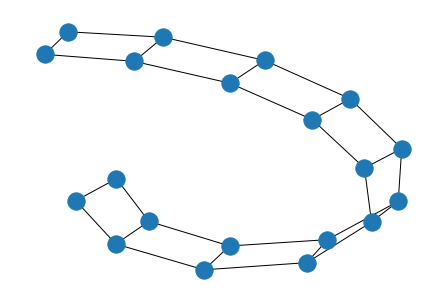

In [4]:
nx.draw(G, label=True)

From this graph, we define the cluster state like equation ... (REFERENCE EQUATION). 

In [5]:
import pennylane as qml

qubits = [str(n) for n in G.nodes] # Somehow, defining the dev to have tuples as wires doesn't work, quick fix like this 

dev = qml.device("default.qubit", wires=qubits)

@qml.qnode(dev)
def cluster_state():
    for node in qubits:
        qml.Hadamard(wires = [node])
        
    for edge in G.edges:
        i, j = edge
        qml.CZ(wires=[str(i),str(j)])
    
    return qml.expval(qml.PauliZ(0)) 

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [6]:
print(qml.draw(cluster_state)()) # Q: can I draw a circuit without requiring return of the Q-function to be predefined?

(0, 0): ──H─╭C─╭C───────────────────────────────────────────────────────────────────────────────┤     
(0, 1): ──H─│──╰Z─╭C─╭C─────────────────────────────────────────────────────────────────────────┤     
(0, 2): ──H─│─────│──╰Z─╭C─╭C───────────────────────────────────────────────────────────────────┤     
(0, 3): ──H─│─────│─────│──╰Z─╭C─╭C─────────────────────────────────────────────────────────────┤     
(0, 4): ──H─│─────│─────│─────│──╰Z─╭C─╭C───────────────────────────────────────────────────────┤     
(0, 5): ──H─│─────│─────│─────│─────│──╰Z─╭C─╭C─────────────────────────────────────────────────┤     
(0, 6): ──H─│─────│─────│─────│─────│─────│──╰Z─╭C─╭C───────────────────────────────────────────┤     
(0, 7): ──H─│─────│─────│─────│─────│─────│─────│──╰Z─╭C─╭C─────────────────────────────────────┤     
(0, 8): ──H─│─────│─────│─────│─────│─────│─────│─────│──╰Z─╭C─╭C───────────────────────────────┤     
(0, 9): ──H─│─────│─────│─────│─────│─────│─────│─────│─────│──╰Z─╭C─────

**[image of a the circuit]**

## Measurements

### Mapping between the gate-based model and the measurement-based model

### Example: how to implement a CNOT gate

## Universality

## Fault-tolerant MBQC

![xanadu-blueprint-2021](mbqc_blueprint.PNG)

# Sources
- Seminal paper by Raussendorf & Briegel (2001) https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.86.5188
- Xanadu Blueprint (2021) https://quantum-journal.org/papers/q-2021-02-04-392/
- MBQC with trapped ions (2013) https://arxiv.org/abs/1308.5102
- Jozsa - Intro to MBQC (2005) https://arxiv.org/abs/quant-ph/0508124
- https://en.wikipedia.org/wiki/One-way_quantum_computer
- Raussendorf et al. - Review of MBQC (2009) https://www.nature.com/articles/nphys1157
- Griffiths - Notes on MBQC (2014) https://quantum.phys.cmu.edu/QCQI/qitd463.pdf 
- M. A. Nielsen - Cluster-state quantum computation (2006) https://arxiv.org/abs/quant-ph/0504097

# Meta

## Goals
- Present Measurement-based quantum computation in an accessible way.
    - This approach is often omitted 
- Reference relevant work of Xanadu like blueprint paper
- Showcase a relatively new feature of PennyLane: [mid-circuit measurements](https://pennylane.readthedocs.io/en/stable/introduction/measurements.html#mid-circuit-measurements-and-conditional-operations)
- Explain the path towards fault-tolerance in MBQC

## Ideas
1. How to implement a parametrized circuit
3. How to implement a two qubit gate (CNOT or CZ or so)
4. Make a cluster state in pennylane
5. Mention FlamingPy and use a EGraph to define the cluster (instead of a networkx graph)

## Discussion
- Can teleportation be seen as MBQC?
- Should we cover additional topics?
- Mention [deferred measurement principle](https://en.wikipedia.org/wiki/Deferred_Measurement_Principle)